In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import matplotlib.dates as mdate
from datetime import datetime
import seaborn as sns
import yfinance

In [11]:
params = {
    "ytick.color" : "black",
    "xtick.color" : "black",
    "axes.labelcolor" : "black",
    "axes.edgecolor" : "black"
}

plt.rcParams.update(params)

In [3]:
tickers = [
    "ABCB4.SA", "ABEV3.SA", "AERI3.SA", "AGRO3.SA", "ALOS3.SA", "ALPA4.SA", "ALUP11.SA", "ANIM3.SA", "AZZA3.SA",
    "ASAI3.SA", "AURE3.SA", "B3SA3.SA", "BBAS3.SA", "BBDC4.SA", "BBSE3.SA", "BEEF3.SA", "BMOB3.SA", "BPAC11.SA",
    "BRAP4.SA", "BRBI11.SA", "BRFS3.SA", "BRST3.SA", "BRSR6.SA", "CEAB3.SA", "CMIG4.SA", "CMIN3.SA", "CPFE3.SA",
    "CPLE6.SA", "CSAN3.SA", "CSMG3.SA", "CSNA3.SA", "CVCB3.SA", "CYRE3.SA", "DIVO11.SA", "ECOR3.SA", "ELET6.SA",
    "ENEV3.SA", "ENGI11.SA", "EQTL3.SA", "ESPA3.SA", "EVEN3.SA", "EZTC3.SA", "FIQE3.SA", "FLRY3.SA", "GGPS3.SA",
    "GMAT3.SA", "GGBR4.SA", "GUAR3.SA", "HAPV3.SA", "HBSA3.SA", "HYPE3.SA", "INTB3.SA", "ITSA4.SA", "ITUB4.SA",
    "JALL3.SA", "JBSS3.SA", "JHSF3.SA", "KEPL3.SA", "KLBN11.SA", "LAVV3.SA", "LEVE3.SA", "LREN3.SA", "MLAS3.SA",
    "MOVI3.SA", "MRFG3.SA", "MRVE3.SA", "MULT3.SA", "MYPK3.SA", "NEOE3.SA", "NGRD3.SA", "NTCO3.SA", "ODPV3.SA",
    "OPCT3.SA", "PETR4.SA", "PETZ3.SA", "PRIO3.SA", "RADL3.SA", "RAIL3.SA", "RAIZ4.SA", "RANI3.SA", "RAPT4.SA",
    "RENT3.SA", "SANB11.SA", "SAPR11.SA", "SBSP3.SA", "SLCE3.SA", "SMAL11.SA", "SMTO3.SA", "STBP3.SA", "SUZB3.SA",
    "TFCO4.SA", "TGMA3.SA", "TIMS3.SA", "TOTS3.SA", "UGPA3.SA", "UNIP6.SA", "USIM5.SA", "VALE3.SA", "VIVA3.SA",
    "VIVT3.SA", "VULC3.SA", "YDUQ3.SA", "^BVSP"
]

In [4]:
cotacoes = yfinance.download(tickers=tickers, start="2008-12-28", end="2023-01-01", auto_adjust=True)["Close"]

[*********************100%***********************]  103 of 103 completed

1 Failed download:
['BRST3.SA']: YFPricesMissingError('possibly delisted; no price data found  (1d 2008-12-28 -> 2023-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1230429600, endDate = 1672542000")')


In [5]:
cotacoes = cotacoes.dropna(axis=1)

tickers_atualizados = cotacoes.columns.to_list()

In [6]:
def janelas_moveis_retorno_acumulado(df, dias, anos):

    janela_movel = df.pct_change(periods=dias).dropna()

    lista_retornos = []

    for coluna in df.columns:
        media_retorno_acumulado = janela_movel[coluna].mean()
        valor_ao_ano = (1 + media_retorno_acumulado)**(1/anos) - 1
        lista_retornos.append(valor_ao_ano)

    return lista_retornos

In [7]:
janela_1_ano_geral = janelas_moveis_retorno_acumulado(cotacoes, 250, anos = 1)
janela_3_ano_geral = janelas_moveis_retorno_acumulado(cotacoes, 250 * 3, anos = 3)
janela_5_ano_geral = janelas_moveis_retorno_acumulado(cotacoes, 250 * 5, anos = 5)
janela_10_ano_geral = janelas_moveis_retorno_acumulado(cotacoes, 250 * 10, anos = 10)

In [ ]:
tabela_janelas_moveis = pd.DataFrame(data = {
    '1 ano' : janela_1_ano_geral,
    '3 anos' : janela_3_ano_geral,
    '5 anos' : janela_5_ano_geral,
    '10 anos' : janela_10_ano_geral
}, index = tickers_atualizados)

In [9]:
for coluna in tabela_janelas_moveis.columns:
    tabela_janelas_moveis[f'{coluna}'] = (tabela_janelas_moveis[f'{coluna}'].round(2)) * 100

tabela_janelas_moveis

,1 ano,3 anos,5 anos,10 anos
ABCB4.SA,20.0,15.0,15.0,14.0
ABEV3.SA,17.0,17.0,15.0,13.0
AGRO3.SA,17.0,16.0,15.0,14.0
ALPA4.SA,33.0,32.0,26.0,25.0
BBAS3.SA,16.0,13.0,13.0,12.0
BBDC4.SA,10.0,11.0,12.0,10.0
BEEF3.SA,23.0,13.0,9.0,8.0
BRAP4.SA,32.0,29.0,31.0,15.0
BRFS3.SA,5.0,6.0,5.0,1.0
BRSR6.SA,17.0,13.0,10.0,9.0


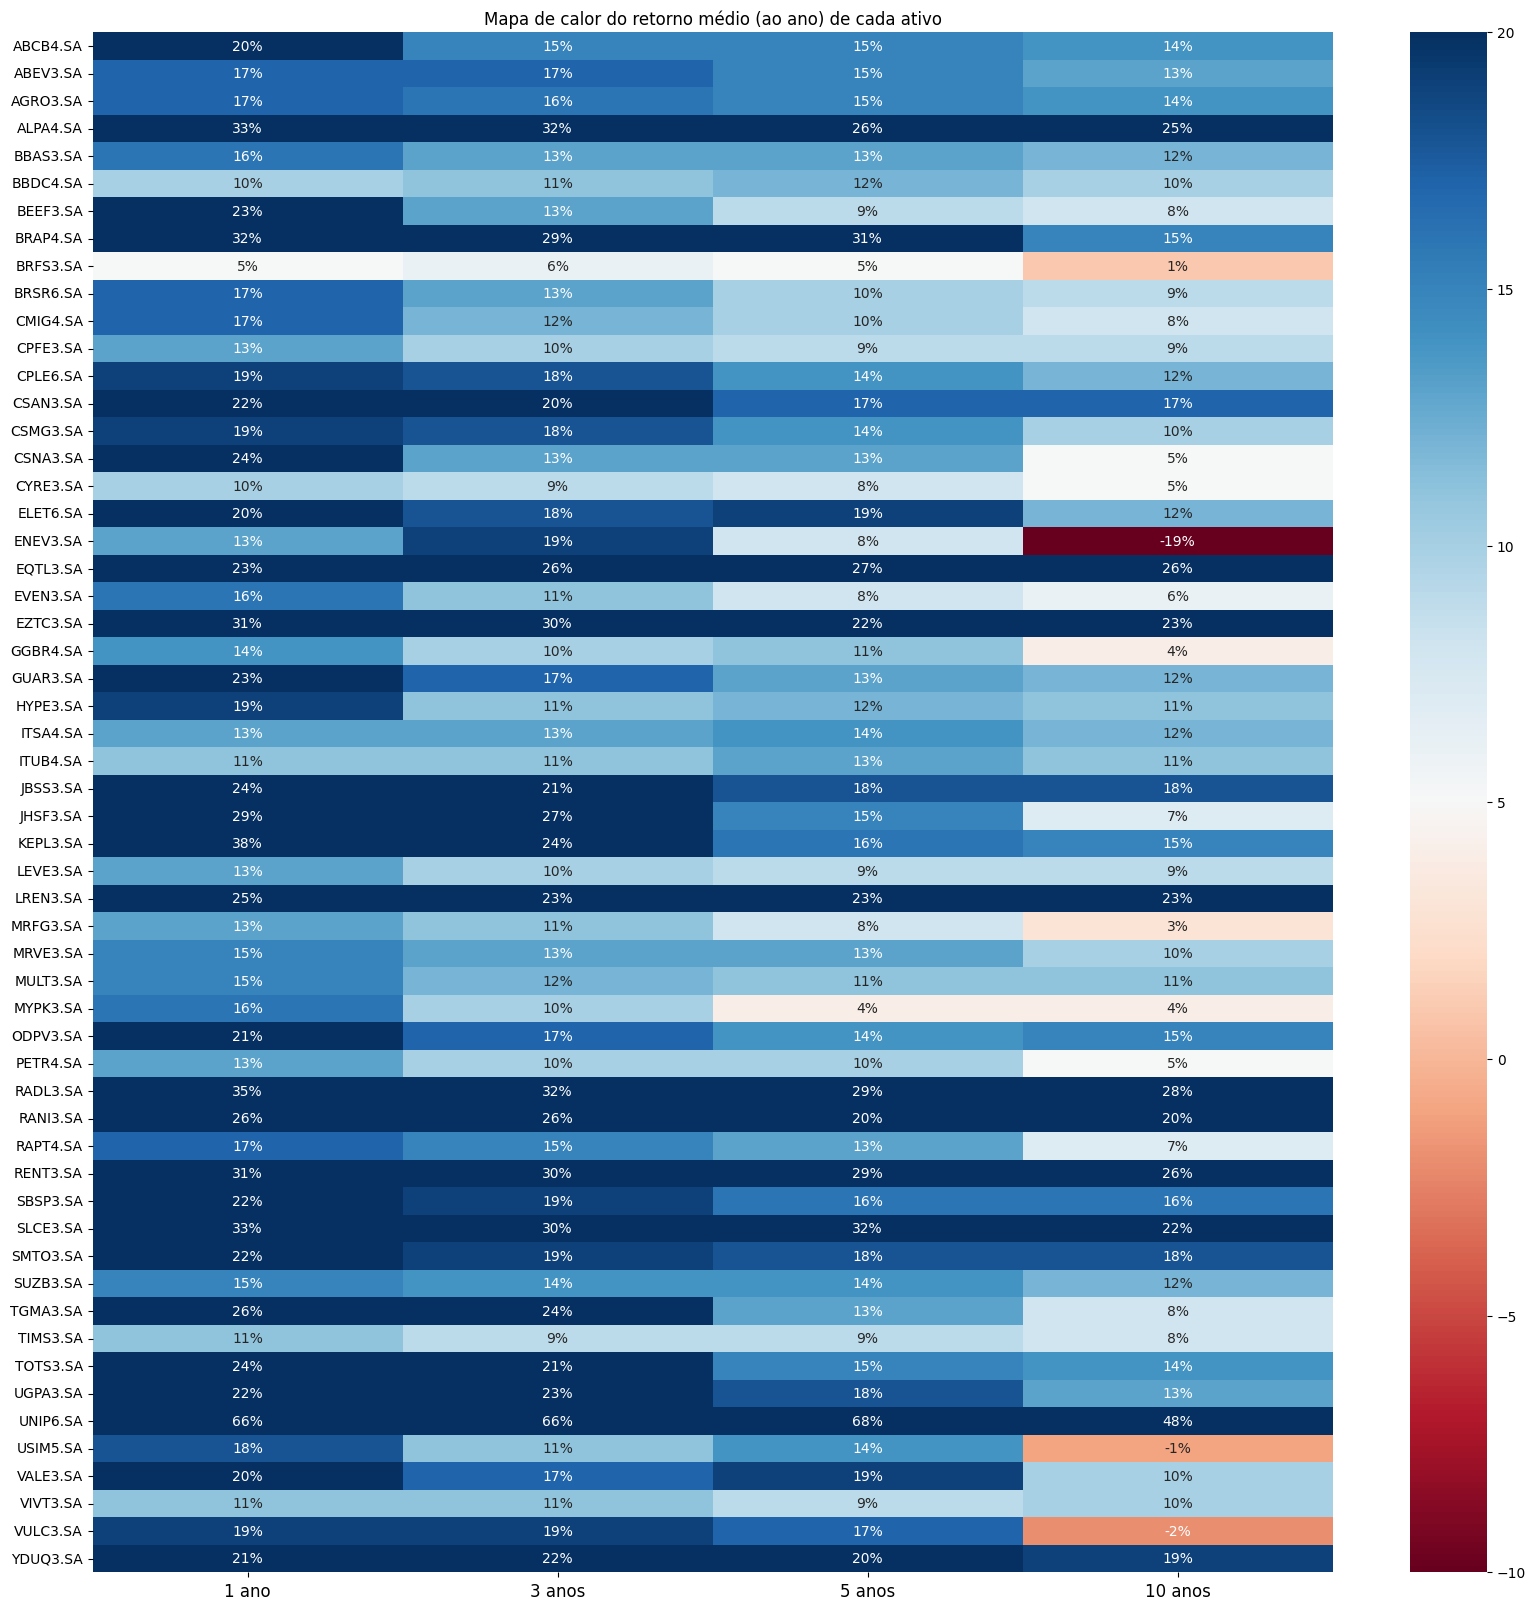

In [36]:
plt.figure(figsize=(20,20))
ax = sns.heatmap(tabela_janelas_moveis, annot = True, cmap="RdBu", fmt="g", vmin= -10, vmax=20, robust=True)

plt.title("Mapa de calor do retorno médio (ao ano) de cada ativo")
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)

for t in ax.texts:
    t.set_text(t.get_text() + "%")

plt.show()